# Data Cleaning and Basic Exploratory Data Analysis & Visuals

## Introduction
For this notebook, we'll be cleaning the `poverty.xls` and `wealth_tables_cy2017.xlsx`. These excel files represent the poverty status of people by age, race, and hispanic origin (1959 to 2019) and the median value of assets (wealth) for households in 2017 based on numerous characteristics. The original dataseta was provided by the U.S. Census Bureau and the poverty data can be found [here](https://www.census.gov/data/tables/2020/demo/income-poverty/p60-270.html) and the wealth data [here](https://www.census.gov/data/tables/2017/demo/wealth/wealth-asset-ownership.html).

**The goal of this EDA are as follows:**
- Compare the net worth of each race, specifically whites vs. blacks
- Poverty rates between whites vs. blacks from 2002 to 2019

For this analysis, we'll be focusing on just the races, and the 2019 values in the poverty table and the 2017 values in the wealth table.

Having looked at the data prior, I already set up a excel sheet(s) that contains our data that we are interested in. 


## Data Cleaning

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Ages 18 to 64
all_races = pd.read_excel("poverty.xls", sheet_name="edit")
white = pd.read_excel("poverty.xls", sheet_name="white")
black = pd.read_excel("poverty.xls", sheet_name="black")
hispanic = pd.read_excel("poverty.xls", sheet_name="hispanic")
asian = pd.read_excel("poverty.xls", sheet_name="asian")
                                        

In [3]:
all_races.head(10) 

# Data doesnt start until row 8
# Columns are year, total population in thousands, number below poverty in thousands, percent below poverty

,"Table with row headers in column A and column headers in rows 4 to 8, 71 to 75, 95 to 99, 139 to 143, 163 to 167, 196 to 200, 220 to 224, 244 to 248, 286 to 290, 310 to 314, 334 to 338, and 354 to 358.",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Table B-6.,NaN,NaN,NaN
1,"Poverty Status of People by Age, Race, and His...",NaN,NaN,NaN
2,(Populations in thousands. Population as of Ma...,NaN,NaN,NaN
3,"Race, Hispanic origin, and year",18 to 64 years,NaN,NaN
4,NaN,Total,Below poverty,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,Number,Percent
7,ALL RACES,NaN,NaN,NaN
8,2019,197475,18660,9.4493
9,2018,197775,21130,10.7


In [4]:
all_races.columns

Index(['Table with row headers in column A and column headers in rows 4 to 8, 71 to 75, 95 to 99, 139 to 143, 163 to 167, 196 to 200, 220 to 224, 244 to 248, 286 to 290, 310 to 314, 334 to 338, and 354 to 358.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

In [5]:
# Mapping the correct column names
all_races.rename({'Table with row headers in column A and column headers in rows 4 to 8, 71 to 75, 95 to 99, 139 to 143, 163 to 167, 196 to 200, 220 to 224, 244 to 248, 286 to 290, 310 to 314, 334 to 338, and 354 to 358.':"year",
                        'Unnamed: 1': "total", 
                        'Unnamed: 2': "number", 
                        'Unnamed: 3': "percent"}, 
                         axis = 1, 
                         inplace = True)

In [6]:
# Confirm changes
all_races.columns 

Index(['year', 'total', 'number', 'percent'], dtype='object')

In [7]:
# Dropping the unnecessary rows
all_races.drop(all_races.index[0:8],
               inplace = True)

In [8]:
all_races.reset_index(drop=True, inplace=True)

In [9]:
all_races.tail(40)

,year,total,number,percent
53,1968,108684,9803,9
54,196721,107024,10725,10
55,1966,105241,11007,10.5
56,1965,(NA),(NA),(NA)
57,1964,(NA),(NA),(NA)
58,1963,(NA),(NA),(NA)
59,1962,(NA),(NA),(NA)
60,1961,(NA),(NA),(NA)
61,1960,(NA),(NA),(NA)
62,1959,96685,16457,17


We can drop index label 56 and onward since we do not have the data from 1959 - 1965 and the remaining rows are footnotes.

In [10]:
all_races.drop(all_races.index[56:],
                     inplace = True)

In [11]:
all_races.head(10)

,year,total,number,percent
0,2019,197475,18660,9.4493
1,2018,197775,21130,10.7
2,20171,198012,21913,11.1
3,2017,198113,22209,11.2
4,2016,197051,22795,11.6
5,2015,197260,24414,12.4
6,2014,196254,26527,13.5
7,20132,194694,25899,13.3
8,20133,194833,26429,13.6
9,2012,193642,26497,13.7


We can see that in the `year` column, there are 2 2017 values. One value being `20171`. The 1 at the end represents the footnote reference at the bottom of the excel sheet. Since we want the years only, we will only get the first 4 digits to get the year.

In [12]:
# Removing the footntoes in year

all_races["year"] = all_races["year"].astype(str).str.slice(stop=4)

In [13]:
all_races["year"].value_counts()

2013    2
2017    2
1980    1
2008    1
2001    1
2006    1
1976    1
2004    1
2018    1
2005    1
1973    1
1989    1
2011    1
2019    1
1995    1
2015    1
1987    1
1979    1
1969    1
2009    1
1983    1
1978    1
2003    1
2016    1
1982    1
1998    1
1994    1
1974    1
2007    1
1997    1
1977    1
2014    1
1967    1
1966    1
1985    1
1984    1
1990    1
1991    1
1992    1
1993    1
1971    1
2012    1
2002    1
1986    1
1970    1
1999    1
1981    1
1975    1
1972    1
1996    1
2010    1
2000    1
1988    1
1968    1
Name: year, dtype: int64

As for dealing with the duplicate row (or what it seems to be), it is actually a reference to a change of data collecting method. For this analysis, we will use the 2nd value of 2017 and 1st value of 2013.

In [14]:
# Confirm changes
all_races.drop([2,8], inplace = True)
all_races["year"].value_counts().sort_index()

1966    1
1967    1
1968    1
1969    1
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
2019    1
Name: year, dtype: int64

In [15]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 55
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     54 non-null     object
 1   total    54 non-null     object
 2   number   54 non-null     object
 3   percent  54 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


From the `.info()` method above, we can see that the columns are not the correct data types. We'll change the columns `year`, `total`, and `number` to int and `percent` to float.

In [16]:
all_races[["year", "total", "number"]] = all_races[["year", "total", "number"]].astype(int)
all_races["percent"] = all_races["percent"].astype(float)

In [17]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 55
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     54 non-null     int64  
 1   total    54 non-null     int64  
 2   number   54 non-null     int64  
 3   percent  54 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


## Cleaning the remainder of `poverty.xls`

Since the remainder of tthe sheets to be cleaned have been created by me, the structure of the data is the same. To make things easier, we will create a function that does specific things to each sheet/dataframe.

One caveat is that the `hispanic` sheet/dataframe has extra values (dating back to 1973 instead of 2002) at the end that is inconsistent with the other sheets. So, we'll clean this one separately.

In [18]:
def clean_data(df):
    
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop(0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename({'Unnamed: 1': "year", 
               'Unnamed: 2': "total", 
               'Unnamed: 3': "number", 
               'Unnamed: 4': "percent"}, axis=1, inplace=True)
    df["year"] = df["year"].astype(str).str.slice(stop=4)
    df.drop([2,8], inplace=True)
    df[["year", "total", "number"]] = df[["year", "total", "number"]].astype(int)
    df["percent"] = df["percent"].astype(float)
    
    return df
    
    

In [19]:
clean_data(white)
clean_data(black)
#clean_data(hispanic)
clean_data(asian)

,year,total,number,percent
0,2019,13373,932,7.0
1,2018,13292,1254,9.4
3,2017,13097,1244,9.5
4,2016,12796,1217,9.5
5,2015,12325,1360,11.0
6,2014,12012,1314,10.9
7,2013,11646,1393,12.0
9,2012,11153,1220,10.9
10,2011,10873,1297,11.9
11,2010,10696,1191,11.1


In [20]:
hispanic.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
45,NaN,1977,6500,1164,17.9
46,NaN,1976,6034,1212,20.1
47,NaN,1975,(NA),(NA),(NA)
48,NaN,197418,(NA),(NA),(NA)
49,NaN,1973,(NA),(NA),(NA)


Since we are only interested in the values from 2002 and onward, we can drop the values that come before 2002.

In [21]:
hispanic.drop(hispanic.index[21:], inplace=True)

Now, we can apply the function that we made to clean the other sheets.

In [22]:
clean_data(hispanic)

,year,total,number,percent
0,2019,37207,4836,13.0
1,2018,36673,5205,14.2
3,2017,36156,5415,15.0
4,2016,35113,5542,15.8
5,2015,34686,6188,17.8
6,2014,33873,6701,19.8
7,2013,32839,6746,20.5
9,2012,32228,6977,21.6
10,2011,31643,6667,21.1
11,2010,30740,6948,22.6


## Cleaning `wealth_tables_cy2017.xlsx` 

Since we are only interested in the values for each race, the only data we need for this analysis is in a sheet called `net_worth`, filtered by me.

In [23]:
wealth = pd.read_excel("wealth_tables_cy2017.xlsx",sheet_name="net_worth")

In [24]:
wealth

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Characteristic,Net Worth
1,NaN,NaN,NaN
2,NaN,Total,104000
3,NaN,Race and Hispanic Origin of Householder,NaN
4,NaN,White alone,136400
5,NaN,".White alone, not Hispanic",171700
6,NaN,Black alone,9567
7,NaN,Asian alone,157400
8,NaN,Other (residual),37660
9,NaN,Hispanic origin (any race),25000


We need to clean the following things:
- Drop the first column
- Change column names 
- Keep the rows that say only a "(Specific Race) Alone"
- Change the data type of the last column

In [25]:
# Dropping the first column
wealth.drop("Unnamed: 0", axis=1, inplace=True)

In [26]:
# Renaming the columns
wealth.rename({"Unnamed: 1": "race",
               "Unnamed: 2": "net_worth"}, axis=1, inplace=True)

In [27]:
# Confirm changes
wealth

,race,net_worth
0,Characteristic,Net Worth
1,NaN,NaN
2,Total,104000
3,Race and Hispanic Origin of Householder,NaN
4,White alone,136400
5,".White alone, not Hispanic",171700
6,Black alone,9567
7,Asian alone,157400
8,Other (residual),37660
9,Hispanic origin (any race),25000


In [28]:
# Keeping the rows that we want
wealth.drop([0,1,3, 5, 8, 10], inplace=True)

In [29]:
wealth.reset_index(drop=True,inplace=True)

In [30]:
# Changing the datatype
wealth["net_worth"] = wealth["net_worth"].astype(float)

In [31]:
# Confirm the changes
wealth

,race,net_worth
0,Total,104000.0
1,White alone,136400.0
2,Black alone,9567.0
3,Asian alone,157400.0
4,Hispanic origin (any race),25000.0


# EDA and Visuals

As mentioned before, **the goal of this EDA are as follows:**
- Compare the net worth of each race, specifically whites vs. blacks
    - Net worth values are only in 2017
- Poverty rates between whites vs. blacks from 2002 to 2019

In [32]:
# Sorting the races by net worth
sorted_wealth = wealth.sort_values(by="net_worth", ascending=False)

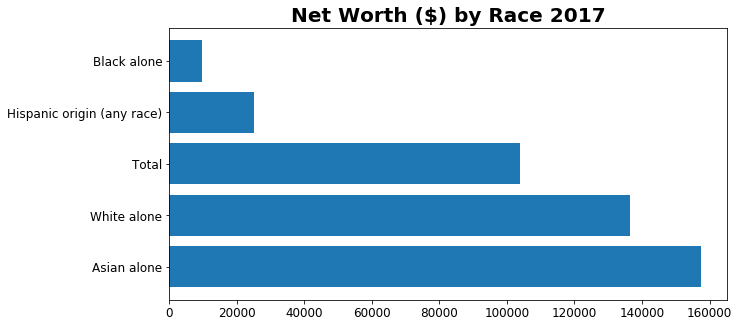

In [33]:
###########################################
## Let's compare net worth for all races ##
###########################################

# Set up figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

# Plotting each race's net worth
plt.barh(y="race", width="net_worth", data=sorted_wealth)

# Changing the title
plt.title("Net Worth ($) by Race 2017",
          fontdict={"fontsize":20, "fontweight":"bold"})

# Changing the tick size
plt.tick_params(labelsize=12)

## Findings

We can see that Asians have the highest net worth (wealth) compare to everyone else and Blacks have the lowest net worth (wealth).

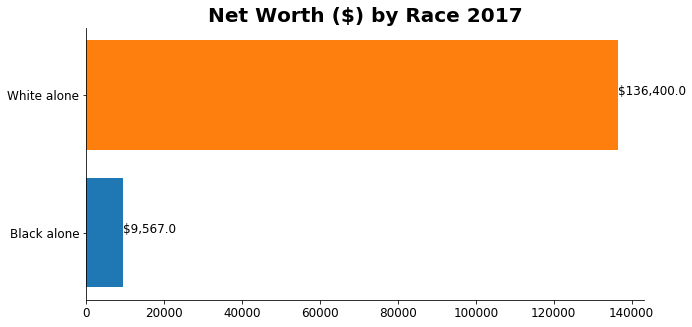

In [34]:
#####################################
## Let's compare blacks vs. whites ##
#####################################

# Masking the data frames for each race
black_wealth = wealth[wealth["race"] == "Black alone"]
white_wealth = wealth[wealth["race"] == "White alone"]

# Setup the figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

# Plotting whites and blacks
plt.barh(y="race", width="net_worth", data=black_wealth)
plt.barh(y="race", width="net_worth", data=white_wealth)

# Changing the title
plt.title("Net Worth ($) by Race 2017",
          fontdict={"fontsize":20, "fontweight":"bold"})

# Changing the tick size
plt.tick_params(labelsize=12)

# Annotating the values for each bar
plt.text(x=black_wealth["net_worth"], 
         y="Black alone", 
         s="${:,}".format(black_wealth["net_worth"].values[0]),
         fontdict={"fontsize":12})

plt.text(x=white_wealth["net_worth"], 
         y="White alone", 
         s="${:,}".format(white_wealth["net_worth"].values[0]),
         fontdict={"fontsize":12})

# Removing graph spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

## Findings

Whites have an average net worth of \\$136,400 compared to blacks having an average of \\$9,567. That is over 10 times the amount.

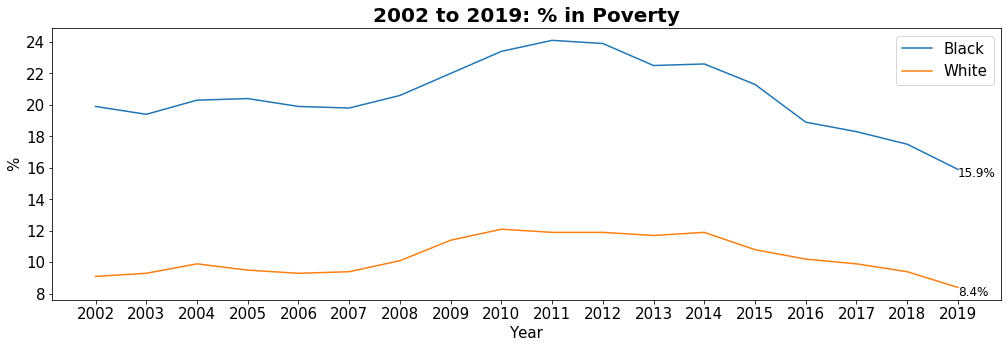

In [35]:
############################################
## Let's plot the poverty rates over time ##
############################################

# Setup figure
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot()

# Plotting the percentage in poverty over time blacks vs whites
plt.plot(black["year"], black["percent"], label="Black")
plt.plot(white["year"], white["percent"], label="White")

# Chaning the axis labels
plt.ylabel("%", fontdict={"fontsize":15})
plt.xlabel("Year", fontdict={"fontsize":15})

# Changing the x ticks and size
plt.xticks(np.arange(min(black["year"]), 
                     max(black["year"]) + 1, 1))
plt.tick_params(labelsize=15)

# Adding a title
plt.title("2002 to 2019: % in Poverty", fontdict={"fontsize":20, "fontweight":"bold"} )

# Adding a legend
plt.legend(fontsize=15)

plt.text(x=2019, 
         y=black["percent"].values[0]-.5, 
         s="{:.1f}%".format(black["percent"].values[0]),
         fontdict={"fontsize":12})
plt.text(x=2019, 
         y=white["percent"].values[0]-.5, 
         s="{:.1f}%".format(white["percent"].values[0]),
         fontdict={"fontsize":12})


plt.show()

## Findings

The disparity has and is still evident amongst blacks and whites. As of 2019, **15.9% of the black respondents are in poverty.** While **8.4% of the white respondents are in poverty.**